In [1]:
import pandas as pd
import csv

from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score

import warnings

## Data Preparing & Cleaning

In [2]:
df = pd.read_csv('data_18.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,CRS_ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,Unnamed: 23
0,2018,1,1,14,7,2018-01-14,N279PQ,15096,SYR,11433,...,735,NaN,NaN,NaN,NaN,1.0,0.0,120.0,NaN,NaN
1,2018,1,1,3,3,2018-01-03,N8928A,15096,SYR,12953,...,1519,-13.0,0.0,0.0,-1.0,0.0,0.0,81.0,78.0,NaN
2,2018,1,1,6,6,2018-01-06,N8986B,15096,SYR,12953,...,1519,24.0,24.0,1.0,1.0,0.0,0.0,81.0,93.0,NaN
3,2018,1,1,7,7,2018-01-07,N8986B,15096,SYR,12953,...,1519,-24.0,0.0,0.0,-2.0,0.0,0.0,81.0,68.0,NaN
4,2018,1,1,8,1,2018-01-08,N8918B,15096,SYR,12953,...,1519,-10.0,0.0,0.0,-1.0,0.0,0.0,81.0,79.0,NaN


In [71]:
df.isnull().values.any()

True

In [3]:
df.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
TAIL_NUM                 2759
ORIGIN_AIRPORT_ID           0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST                        0
CRS_DEP_TIME                0
TAXI_OUT                19708
TAXI_IN                 20242
CRS_ARR_TIME                0
ARR_DELAY               20604
ARR_DELAY_NEW           20604
ARR_DEL15               20604
ARR_DELAY_GROUP         20604
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME     20402
Unnamed: 23            621461
dtype: int64

In [4]:
df = df.drop('Unnamed: 23', axis=1)
df = df.drop(['ARR_DELAY_NEW','TAIL_NUM','FL_DATE'], axis=1)

df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
TAXI_OUT               19708
TAXI_IN                20242
CRS_ARR_TIME               0
ARR_DELAY              20604
ARR_DEL15              20604
ARR_DELAY_GROUP        20604
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME    20402
dtype: int64

- Filling Nulls

In [5]:
df['ACTUAL_ELAPSED_TIME'].fillna(df['ACTUAL_ELAPSED_TIME'].mean(), inplace=True)
df['TAXI_OUT'].fillna(df['TAXI_OUT'].mean(), inplace=True)
df['TAXI_IN'].fillna(df['TAXI_IN'].mean(), inplace=True)
df['ARR_DELAY_GROUP'].fillna(df['ARR_DELAY_GROUP'].mean(), inplace=True)
df['ARR_DELAY'].fillna(df['ARR_DELAY'].mean(), inplace=True)
df = df.fillna({'ARR_DEL15': 1})

In [6]:
df.isnull().sum()


YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
TAXI_OUT               0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
ARR_DEL15              0
ARR_DELAY_GROUP        0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621461 entries, 0 to 621460
Data columns (total 20 columns):
YEAR                   621461 non-null int64
QUARTER                621461 non-null int64
MONTH                  621461 non-null int64
DAY_OF_MONTH           621461 non-null int64
DAY_OF_WEEK            621461 non-null int64
ORIGIN_AIRPORT_ID      621461 non-null int64
ORIGIN                 621461 non-null object
DEST_AIRPORT_ID        621461 non-null int64
DEST                   621461 non-null object
CRS_DEP_TIME           621461 non-null int64
TAXI_OUT               621461 non-null float64
TAXI_IN                621461 non-null float64
CRS_ARR_TIME           621461 non-null int64
ARR_DELAY              621461 non-null float64
ARR_DEL15              621461 non-null float64
ARR_DELAY_GROUP        621461 non-null float64
CANCELLED              621461 non-null float64
DIVERTED               621461 non-null float64
CRS_ELAPSED_TIME       621461 non-null float64
ACTUAL_ELAPSED_T

- Label Encoding

In [8]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['ORIGIN'])
labelEncoder.fit(df['DEST'])
df['ORIGIN'] = labelEncoder.transform(df['ORIGIN'])
df['DEST'] = labelEncoder.transform(df['DEST'])
#df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME
0,2018,1,1,14,7,15096,328,11433,94,535,17.865021,7.490016,735,3.173973,1.0,-0.302366,1.0,0.0,120.0,133.225134
1,2018,1,1,3,3,15096,328,12953,191,1358,22.000000,14.000000,1519,-13.000000,0.0,-1.000000,0.0,0.0,81.0,78.000000
2,2018,1,1,6,6,15096,328,12953,191,1358,41.000000,7.000000,1519,24.000000,1.0,1.000000,0.0,0.0,81.0,93.000000
3,2018,1,1,7,7,15096,328,12953,191,1358,12.000000,18.000000,1519,-24.000000,0.0,-2.000000,0.0,0.0,81.0,68.000000
4,2018,1,1,8,1,15096,328,12953,191,1358,17.000000,23.000000,1519,-10.000000,0.0,-1.000000,0.0,0.0,81.0,79.000000


In [10]:
df.drop(df.index[df['ARR_DELAY_GROUP'] < 0], inplace = True)
#df.drop(df.index[df['ARR_DEL15 '] == 0], inplace = True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206568 entries, 2 to 621457
Data columns (total 20 columns):
YEAR                   206568 non-null int64
QUARTER                206568 non-null int64
MONTH                  206568 non-null int64
DAY_OF_MONTH           206568 non-null int64
DAY_OF_WEEK            206568 non-null int64
ORIGIN_AIRPORT_ID      206568 non-null int64
ORIGIN                 206568 non-null int32
DEST_AIRPORT_ID        206568 non-null int64
DEST                   206568 non-null int32
CRS_DEP_TIME           206568 non-null int64
TAXI_OUT               206568 non-null float64
TAXI_IN                206568 non-null float64
CRS_ARR_TIME           206568 non-null int64
ARR_DELAY              206568 non-null float64
ARR_DEL15              206568 non-null float64
ARR_DELAY_GROUP        206568 non-null float64
CANCELLED              206568 non-null float64
DIVERTED               206568 non-null float64
CRS_ELAPSED_TIME       206568 non-null float64
ACTUAL_ELAPSED_TIM

### - I selected the ARR_DELAY_GROUP to be the target label as it maps the delay interval into groups , it was having negative values I dropped them, the lables are  (0,1,2,3,4,5,6,7,8,9,10,11,12)

## Decision Tree Model

In [14]:
x = df.drop(['ARR_DELAY_GROUP','ARR_DEL15'], axis=1)
y =  df['ARR_DELAY_GROUP']

## Using ensembling to determine the importance of the features 

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.         0.         0.02664561 0.01556208 0.03475044
 0.03488448 0.03477781 0.0348633  0.04291781 0.05499353 0.04318653
 0.04260536 0.54820974 0.         0.         0.04205054 0.04455278]


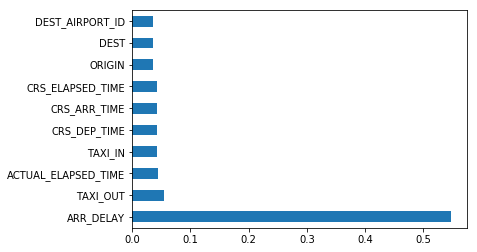

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
X_train_c, X_test_c, y_train_c, y_test_c= train_test_split(x, y, test_size=0.3, random_state=42)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=4)
cvScores = cross_val_score(dt, X_train_c, y_train_c, cv=20)
print ('Mean cross validation score is: ' + str(np.mean(cvScores)))

# Fit dt to the training set
dt.fit(X_train_c,y_train_c)

Mean cross validation score is: 0.8647829321523777


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:

# dt = DecisionTreeClassifier()

# param_grid = {
#                  'max_depth': [2,4],
#                 'min_samples_split': [2, 4],
#                'min_samples_leaf': [2, 4],
#                'max_features': ['sqrt', 'log2'],
#                  "criterion" : ["gini"]
#              }

# grid_dt = GridSearchCV(dt, param_grid, cv=20)
# grid_dt.fit(X_train_c, y_train_c)
# #bestModel = grid_rf.best_estimator_
# bestParameters = grid_dt.best_params_
# gridScores = grid_dt.cv_results_

In [38]:
# #print(bestModel)
# print(bestParameters)
# gridScores

In [36]:
#dt = DecisionTreeClassifier(max_depth = bestParameters.get('max_depth'), 
#                           min_samples_split=bestParameters.get('min_samples_split'),
#                          min_samples_leaf = bestParameters.get('min_samples_leaf'),
#                          max_features = bestParameters.get('max_features'),
#                           criterion = bestParameters.get('criterion'))

#cv = KFold(n_splits=20, shuffle=True, random_state=2)
#cvScores = cross_val_score(dt, X_train_c, y_train_c, cv=cv)
#print ('Mean cross validation score is: ' + str(np.mean(cvScores)))
#dt.fit(X_train_c, y_train_c)
#print('Random forest training and testing with with non-redundant variables took [', 
    #  datetime.now() - startTimeRF, '] seconds.')

Test_accuracy=0.8632102112278324


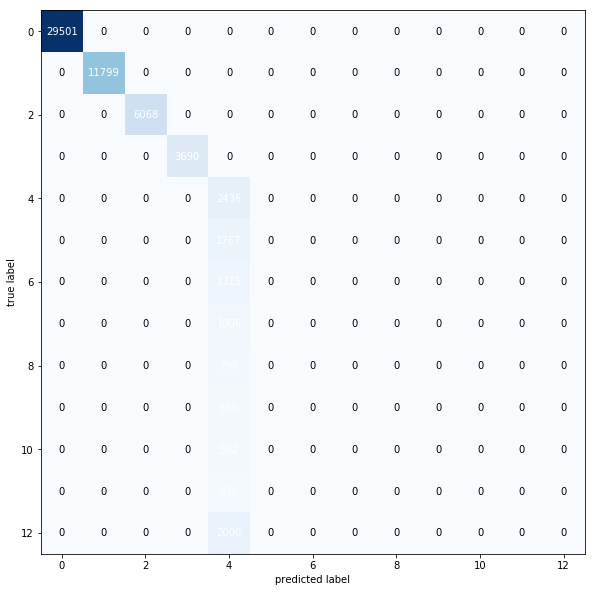

In [42]:
from mlxtend.plotting import plot_confusion_matrix
Y_dt_pred = dt.predict(X_test_c)
Test_acc_dt =accuracy_score(y_test_c, Y_dt_pred)
conf1= confusion_matrix(y_test_c, Y_dt_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf1, figsize=(10, 10))
print("Test_accuracy=" + str(Test_acc_dt))
plt.show()


<span style="color:red"> *- This confusion matrix seems unlogic and has something wrong and that's because having low precision and low recall values.* </span>

In [44]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test_c, Y_dt_pred, average='macro')

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.3248630779099028, 0.38461538461538464, 0.3357670122221774, None)

<span style="color:blue"> *- Values of percision and recall are too small, a situation of Low Precision emerges when very few of the positive predictions are true, and Low Recall occurs if most of the positive values are never predicted. In conclusion the DT model needs more feature engineering and parameters tuning* </span>


In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Multi class format not supported by ROC curve

In [31]:

#auc1 = roc_auc_score(y_test_c, Y_dt_pred)

#print('AUC1: %.2f' % auc1)


## Random Forest

In [21]:

x = df.drop(['ARR_DELAY_GROUP','ARR_DEL15'], axis=1)
y =  df['ARR_DELAY_GROUP']
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

## I used GridSearch to find the best model and best parameters for Random Forest

In [22]:
startTimeGS = datetime.now()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

SEED = 1

#rf = RandomForestRegressor(n_estimators=600, min_samples_leaf=0.05,random_state=SEED)

#from sklearn.grid_search import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10],
#                 'min_samples_split': [2, 4],
#                 'min_samples_leaf': [2, 4],
#                 'max_features': ['sqrt', 'log2'],
                 "criterion" : ["gini"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=20)
grid_rf.fit(X_train, y_train)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:00:52.096718 ] seconds.


In [23]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'criterion': 'gini', 'n_estimators': 10}


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([1.98933188]),
 'std_fit_time': array([0.17252753]),
 'mean_score_time': array([0.02020721]),
 'std_score_time': array([0.00252074]),
 'param_criterion': masked_array(data=['gini'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 10}],
 'split0_test_score': array([0.94376587]),
 'split1_test_score': array([0.93638892]),
 'split2_test_score': array([0.94328214]),
 'split3_test_score': array([0.9276817]),
 'split4_test_score': array([0.95489176]),
 'split5_test_score': array([0.94749577]),
 'split6_test_score': array([0.93138085]),
 'split7_test_score': array([0.94796079]),
 'split8_test_score': array([0.9553431]),
 'split9_test_score': array([0.9469862]),
 'split10_test_score': array([0.94081336]),
 'split11_test_score': array([0.94044305]),
 'split12_test_s

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np
startTimeRF = datetime.now()
rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
#                            min_samples_split=bestParameters.get('min_samples_split'),
#                           min_samples_leaf = bestParameters.get('min_samples_leaf'),
#                           max_features = bestParameters.get('max_features'),
                           criterion = bestParameters.get('criterion'))

cv = KFold(n_splits=20, shuffle=True, random_state=2)
cvScores = cross_val_score(rf, X_train, y_train, cv=cv)
print ('Mean cross validation score is: ' + str(np.mean(cvScores)))
rf.fit(X_train, y_train)
print('Random forest training and testing with with non-redundant variables took [', 
      datetime.now() - startTimeRF, '] seconds.')

Mean cross validation score is: 0.9452601239867532
Random forest training and testing with with non-redundant variables took [ 0:00:39.805581 ] seconds.


Test_accuracy=0.9308708912233141


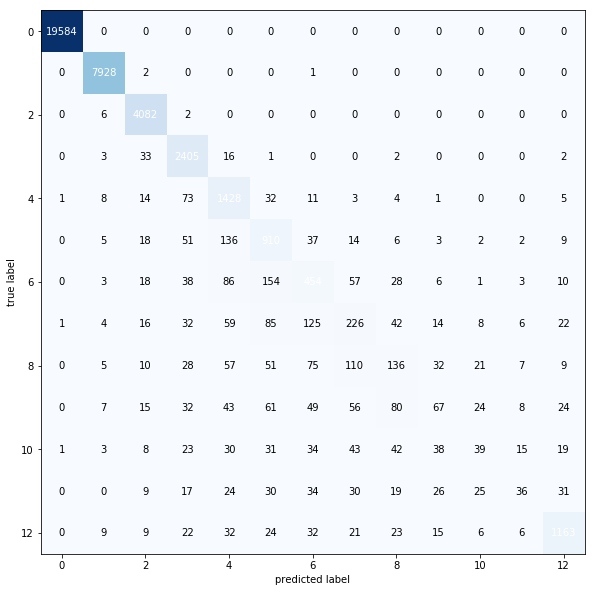

In [25]:
Y_rf_pred = rf.predict(X_test)
Test_acc_rf =accuracy_score(y_test, Y_rf_pred)
conf= confusion_matrix(y_test, Y_rf_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(10, 10))
print('Test_accuracy='+str(Test_acc_rf))
plt.show()

In [45]:
precision_recall_fscore_support(y_test, Y_rf_pred, average='macro')

(0.6549104718312113, 0.6169351537513327, 0.6215119359601349, None)

## Predicting using 2019 data

#### Applying the same preprocessing steps like 2018 data

In [26]:
df2 = pd.read_csv('data_19.csv')
df2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,...,CRS_ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,Unnamed: 23
0,2019,1,1,11,5,2019-01-11,N220WN,13204,MCO,14122,...,1135,-4.0,0.0,0.0,-1.0,0.0,0.0,135.0,133.0,NaN
1,2019,1,1,11,5,2019-01-11,N7889A,13204,MCO,14122,...,1645,-5.0,0.0,0.0,-1.0,0.0,0.0,145.0,138.0,NaN
2,2019,1,1,11,5,2019-01-11,N764SW,13204,MCO,14307,...,1545,-13.0,0.0,0.0,-1.0,0.0,0.0,165.0,153.0,NaN
3,2019,1,1,11,5,2019-01-11,N8309C,13204,MCO,14307,...,2255,-4.0,0.0,0.0,-1.0,0.0,0.0,160.0,161.0,NaN
4,2019,1,1,11,5,2019-01-11,N8686A,13204,MCO,14307,...,1035,-7.0,0.0,0.0,-1.0,0.0,0.0,160.0,155.0,NaN


In [27]:
df2.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
TAIL_NUM                 4685
ORIGIN_AIRPORT_ID           0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST                        0
CRS_DEP_TIME                0
TAXI_OUT                19396
TAXI_IN                 19939
CRS_ARR_TIME                0
ARR_DELAY               21000
ARR_DELAY_NEW           21000
ARR_DEL15               21000
ARR_DELAY_GROUP         21000
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME            8
ACTUAL_ELAPSED_TIME     21000
Unnamed: 23            638649
dtype: int64

In [99]:
df2 = df2.drop('Unnamed: 23', axis=1)
df2 = df2.drop(['ARR_DELAY_NEW','TAIL_NUM','FL_DATE'], axis=1)

df2.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
TAXI_OUT               19396
TAXI_IN                19939
CRS_ARR_TIME               0
ARR_DELAY              21000
ARR_DEL15              21000
ARR_DELAY_GROUP        21000
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           8
ACTUAL_ELAPSED_TIME    21000
dtype: int64

In [100]:
df2[df2.isnull().values.any(axis=1)].head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME
20,2019,1,1,11,5,13204,MCO,15016,STL,1815,NaN,NaN,1950,NaN,NaN,NaN,1.0,0.0,155.0,NaN
117,2019,1,1,11,5,13232,MDW,12889,LAS,1110,NaN,NaN,1320,NaN,NaN,NaN,1.0,0.0,250.0,NaN
141,2019,1,1,11,5,13232,MDW,13198,MCI,2140,NaN,NaN,2315,NaN,NaN,NaN,1.0,0.0,95.0,NaN
144,2019,1,1,11,5,13232,MDW,13204,MCO,1615,NaN,NaN,1950,NaN,NaN,NaN,1.0,0.0,155.0,NaN
200,2019,1,1,11,5,13232,MDW,14730,SDF,2130,NaN,NaN,2345,NaN,NaN,NaN,1.0,0.0,75.0,NaN


In [101]:
df2['ACTUAL_ELAPSED_TIME'].fillna(df2['ACTUAL_ELAPSED_TIME'].mean(), inplace=True)
df2['TAXI_OUT'].fillna(df2['TAXI_OUT'].mean(), inplace=True)
df2['TAXI_IN'].fillna(df2['TAXI_IN'].mean(), inplace=True)
df2['ARR_DELAY_GROUP'].fillna(df2['ARR_DELAY_GROUP'].mean(), inplace=True)

df2['ARR_DELAY'].fillna(df2['ARR_DELAY'].mean(), inplace=True)
df2 = df2.fillna({'ARR_DEL15': 1})



In [102]:
labelEncoder.fit(df2['ORIGIN'])
labelEncoder.fit(df2['DEST'])
df2['ORIGIN'] = labelEncoder.transform(df2['ORIGIN'])
df2['DEST'] = labelEncoder.transform(df2['DEST'])
#df2.head()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638649 entries, 0 to 638648
Data columns (total 20 columns):
YEAR                   638649 non-null int64
QUARTER                638649 non-null int64
MONTH                  638649 non-null int64
DAY_OF_MONTH           638649 non-null int64
DAY_OF_WEEK            638649 non-null int64
ORIGIN_AIRPORT_ID      638649 non-null int64
ORIGIN                 638649 non-null int32
DEST_AIRPORT_ID        638649 non-null int64
DEST                   638649 non-null int32
CRS_DEP_TIME           638649 non-null int64
TAXI_OUT               638649 non-null float64
TAXI_IN                638649 non-null float64
CRS_ARR_TIME           638649 non-null int64
ARR_DELAY              638649 non-null float64
ARR_DEL15              638649 non-null float64
ARR_DELAY_GROUP        638649 non-null float64
CANCELLED              638649 non-null float64
DIVERTED               638649 non-null float64
CRS_ELAPSED_TIME       638641 non-null float64
ACTUAL_ELAPSED_TIM

In [103]:
df2.drop(df2.index[df2['ARR_DELAY_GROUP'] < 0], inplace = True)

In [104]:
x2 = df2.drop('ARR_DELAY_GROUP', axis=1)
y2 =  df2['ARR_DELAY_GROUP']
#X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(x2,y2, test_size=0.2, random_state=42)

## Predicting Random Forest with 2019

In [105]:
y_predict_19_rf= rf.predict(x2)


Test_accuracy=0.943211119077626


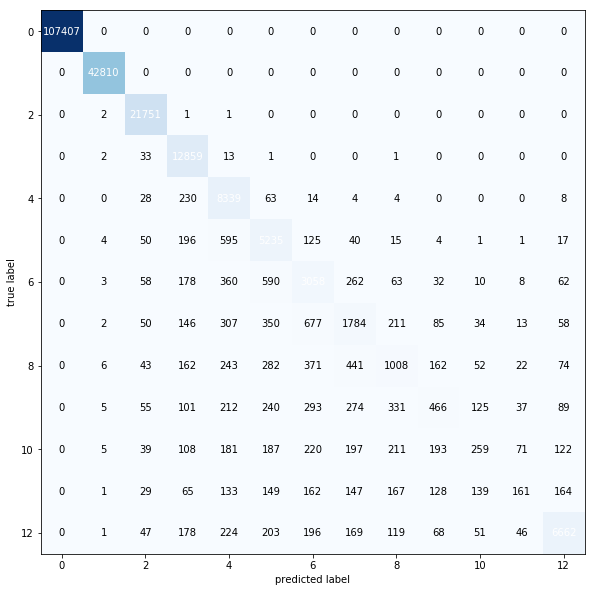

In [106]:

rf_test_acc =accuracy_score(y2, y_predict_19_rf)

conf= confusion_matrix(y2, y_predict_19_rf)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(10, 10))
print("Test_accuracy=" + str(rf_test_acc))
plt.show()


## Predicting Decision Tree with 2019

In [107]:
y_predict_19_dt= dt.predict(x2)

Test_accuracy=0.8620357958771059


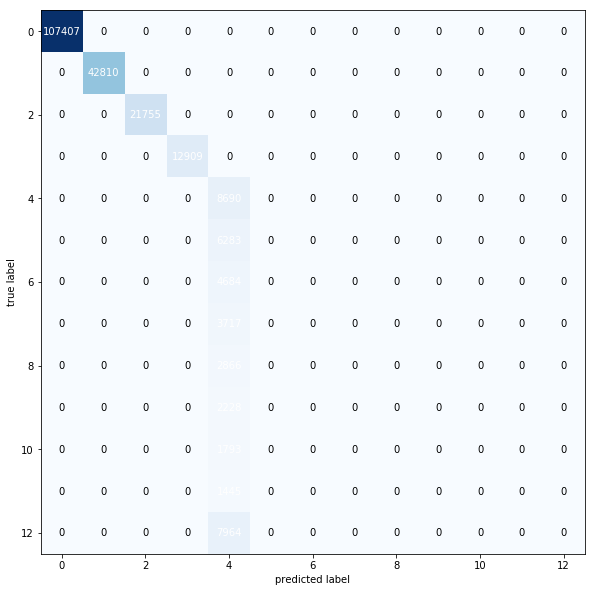

In [108]:
conf= confusion_matrix(y2, y_predict_19_dt)
dt_test_acc =accuracy_score(y2, y_predict_19_dt)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(10, 10))
print("Test_accuracy=" + str(dt_test_acc))

plt.show()


## - From the confusion matrices and accuracies of the two models, it shows that the Random Forest performs very well than Decision Tree. The main advantage of Random Forest is, it fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting. 